This notebook is a data wrangling exercise. 

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

First thing to do is read in the data and take a look at it to verify that it read in correctly.

In [2]:
movie_data = pd.read_table('http://bit.ly/movieusers', sep ='|', header = None)
movie_data.head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
movie_data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [4]:
movie_data.shape

(943, 5)

In [21]:
movie_data.describe()

,Age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [5]:
movie_data = movie_data.rename(columns = {0:'Index', 1:'Age', 2:'Sex', 3:'Job', 4:'Zipcode'})
movie_data.head()

,Index,Age,Sex,Job,Zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
movie_data.drop(['Index','Zipcode'], axis = 1, inplace = True)
movie_data.head()

,Age,Sex,Job
0,24,M,technician
1,53,F,other
2,23,M,writer
3,24,M,technician
4,33,F,other


In [7]:
movie_data.loc[movie_data.Sex == 'M' , 'Sex'] = 'Male'
movie_data.loc[movie_data.Sex == 'F' , 'Sex'] = 'Female'
movie_data.head()

,Age,Sex,Job
0,24,Male,technician
1,53,Female,other
2,23,Male,writer
3,24,Male,technician
4,33,Female,other


In [8]:
movie_data.Job.unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'], dtype=object)

Say we are interested in movie reviewers who work in the STEM field. We can plot distributions to understand the data better. 

In [9]:
plt_data = movie_data[movie_data.Job.isin(['engineer', 'technician', 'programmer', 'scientist', 'doctor'])]

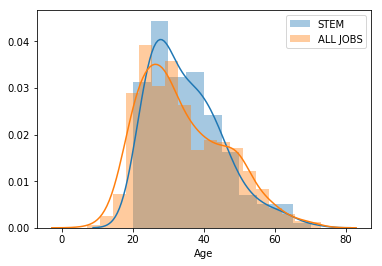

In [19]:
sb.distplot(plt_data.Age, label = 'STEM')
sb.distplot(movie_data.Age, label = 'ALL JOBS')
plt.legend()

In [ ]:
sb.distplot(plt_data.Age, label = 'STEM')
sb.distplot(movie_data.Age, label = 'ALL JOBS')
plt.legend()

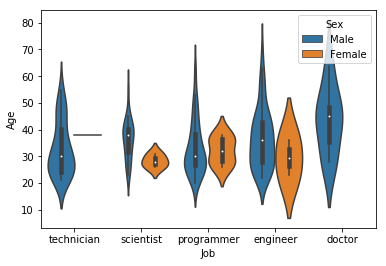

In [20]:
sb.violinplot(x = plt_data.Job, y = plt_data.Age, hue = plt_data.Sex)
plt.show()